In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud


In [2]:
df = pd.read_csv("C:\\Users\\gitan\\Downloads\\Analyzing Global Video Game Sales Trends.zip")

In [3]:
print(df.head())
print(df.info())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

In [ ]:
df = df.dropna(subset=['Year', 'Genre', 'Publisher'])  # Drop rows with missing important info
df['Year'] = df['Year'].astype(int)

C:\Users\gitan\AppData\Local\Temp\ipykernel_6708\710804019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_10, palette='viridis')


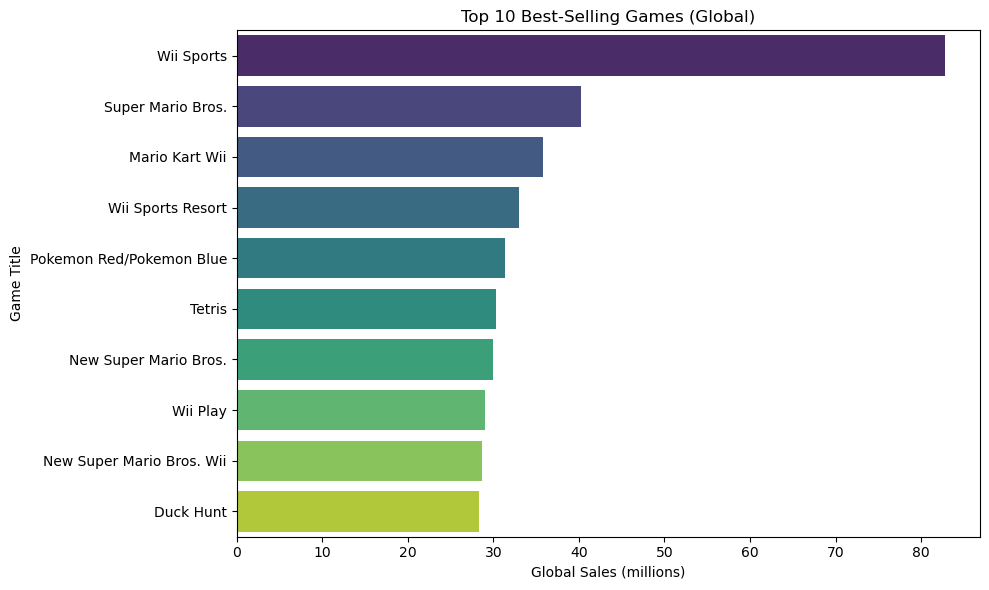

In [5]:
top_10 = df.sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_10, palette='viridis')
plt.title("Top 10 Best-Selling Games (Global)")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

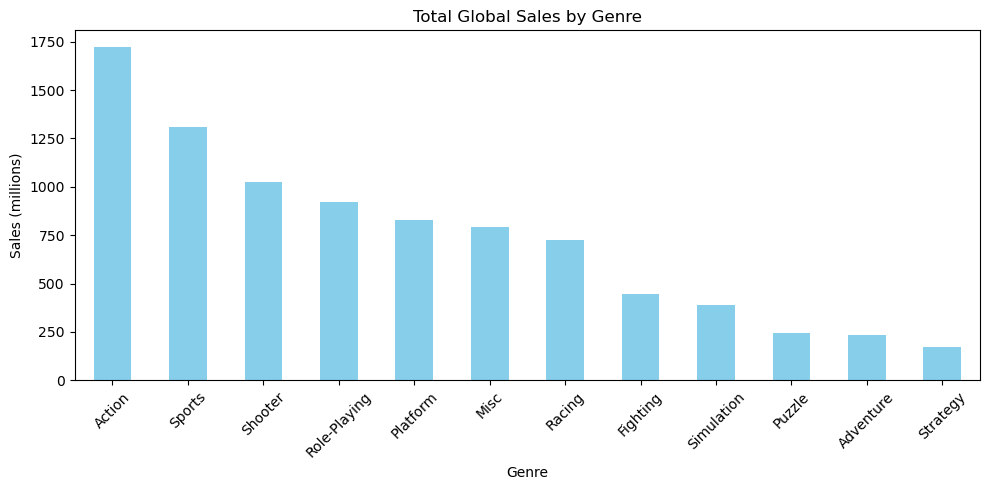

In [6]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Total Global Sales by Genre")
plt.ylabel("Sales (millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



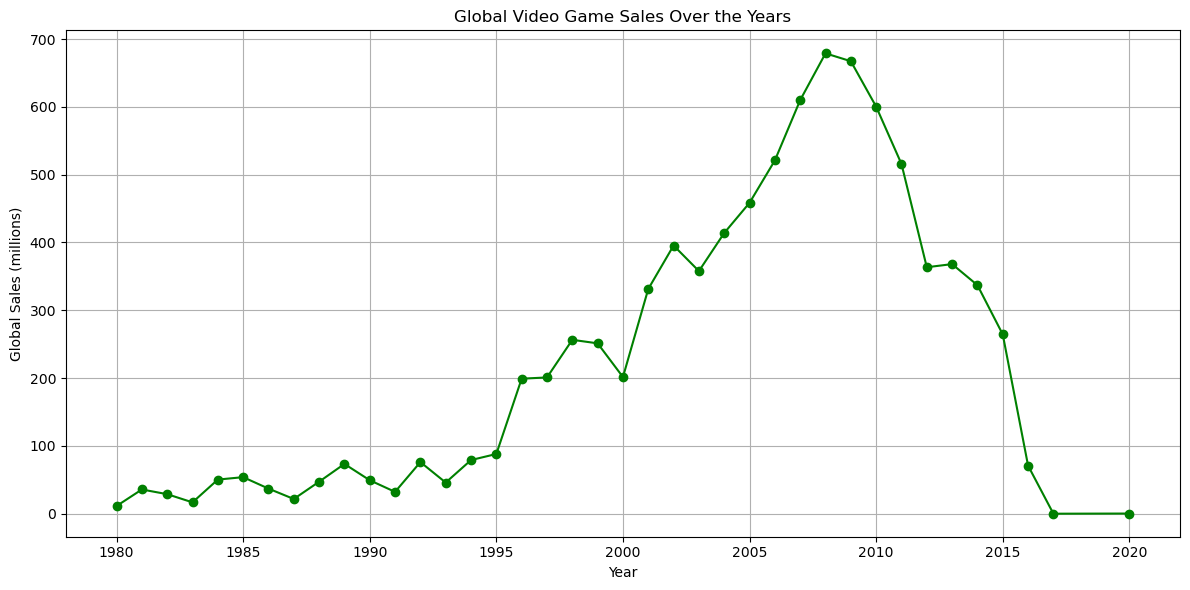

In [7]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year.plot(kind='line', figsize=(12, 6), marker='o', color='green')
plt.title("Global Video Game Sales Over the Years")
plt.ylabel("Global Sales (millions)")
plt.grid(True)
plt.tight_layout()
plt.show()

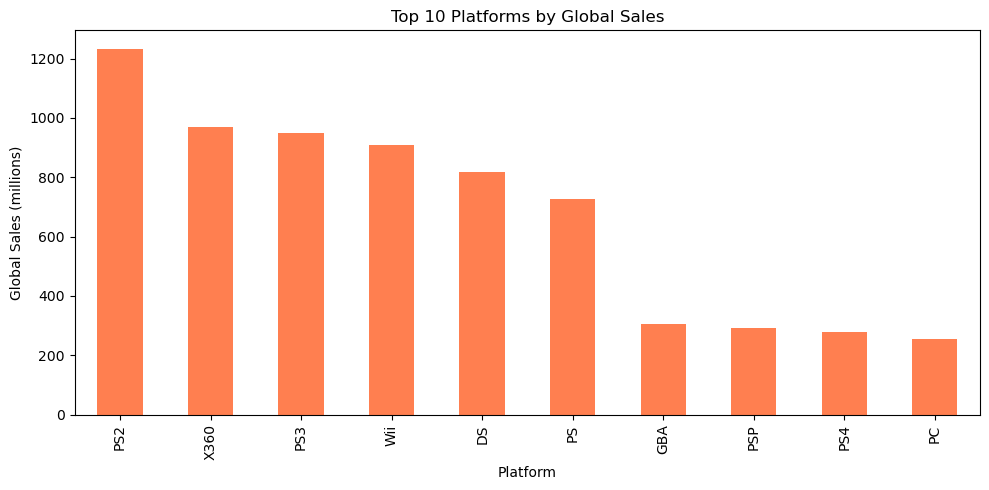

In [8]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
platform_sales.plot(kind='bar', figsize=(10, 5), color='coral')
plt.title("Top 10 Platforms by Global Sales")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

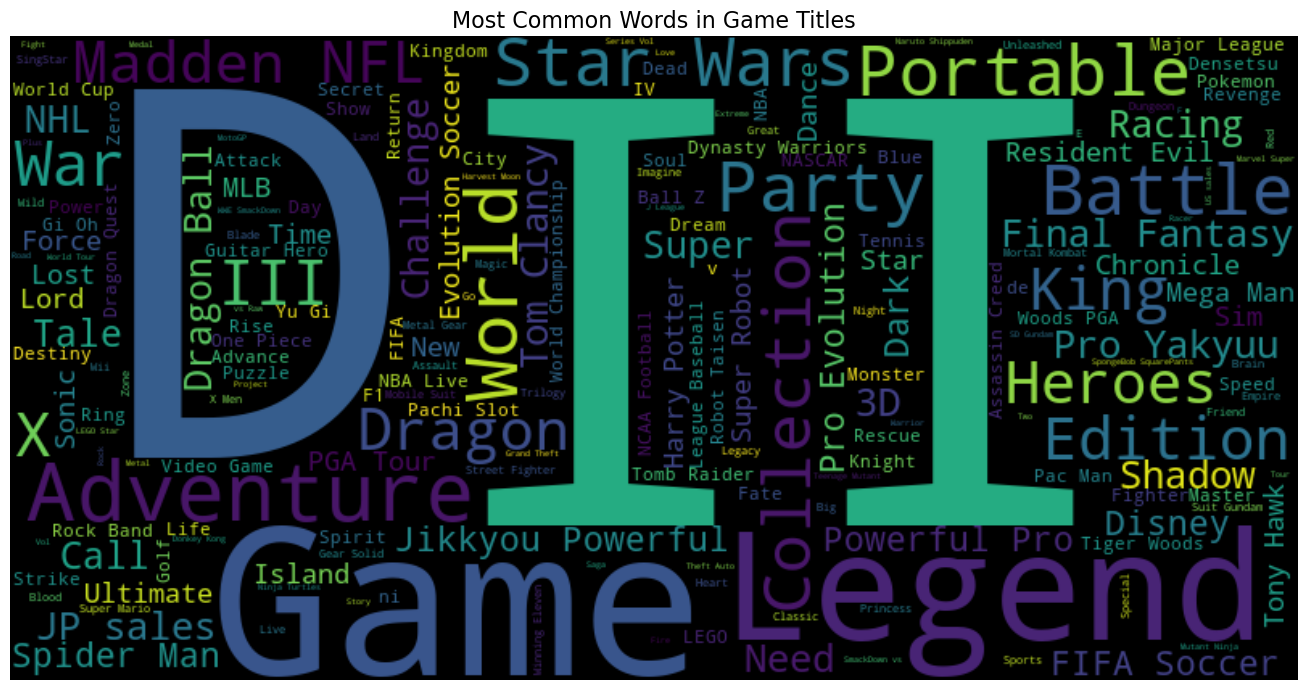

In [9]:
titles = ' '.join(df['Name'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Game Titles", fontsize=16)
plt.tight_layout()
plt.show()

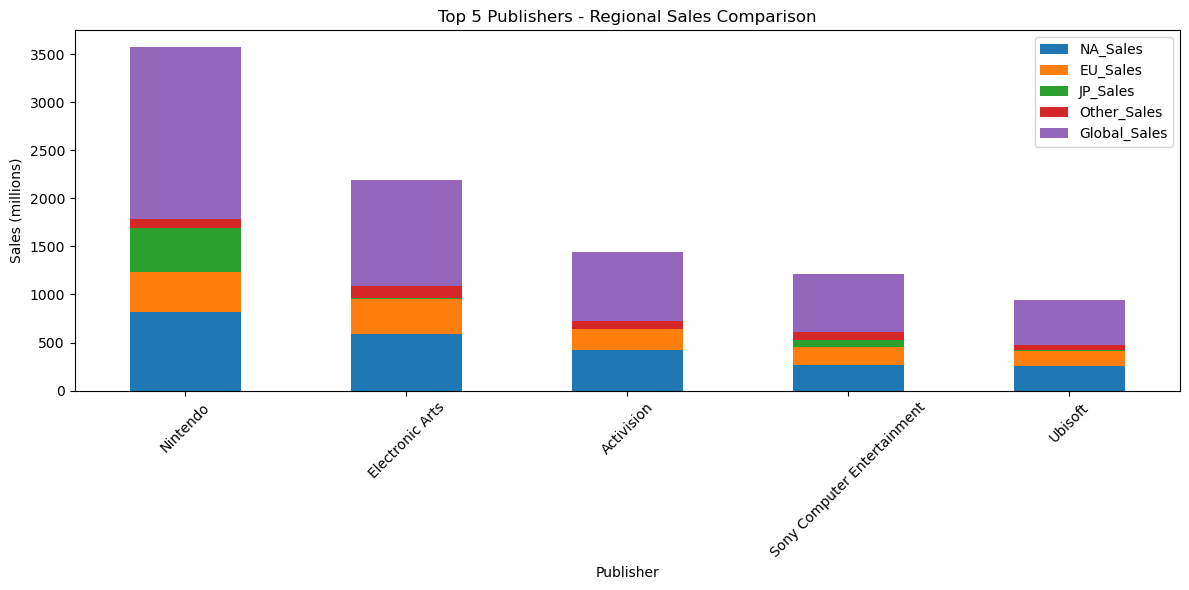

In [ ]:
top_publishers = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending=False).head(5)
top_publishers.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title("Top 5 Publishers - Regional Sales Comparison")
plt.ylabel("Sales (millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

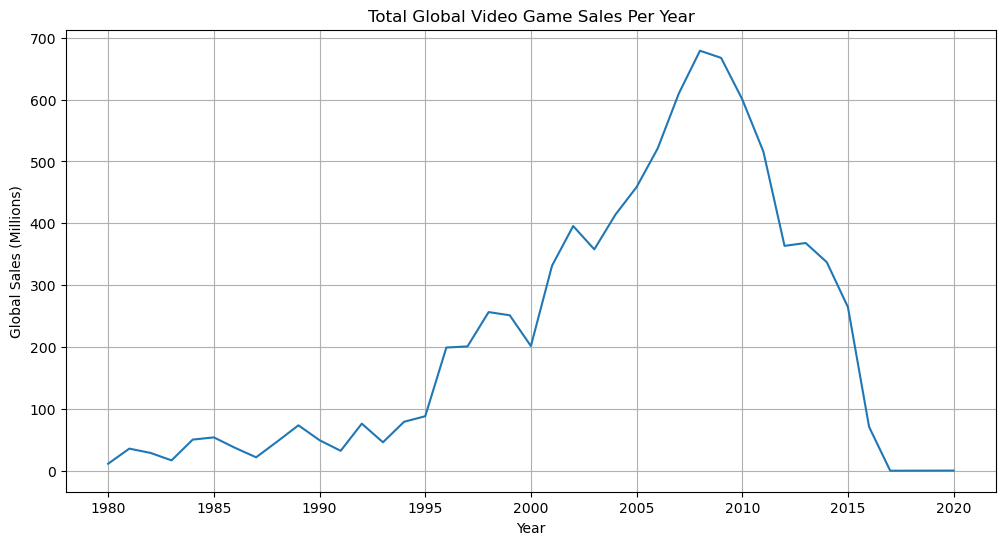

In [11]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title("Total Global Video Game Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.show()


C:\Users\gitan\AppData\Local\Temp\ipykernel_6708\2145998506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False),


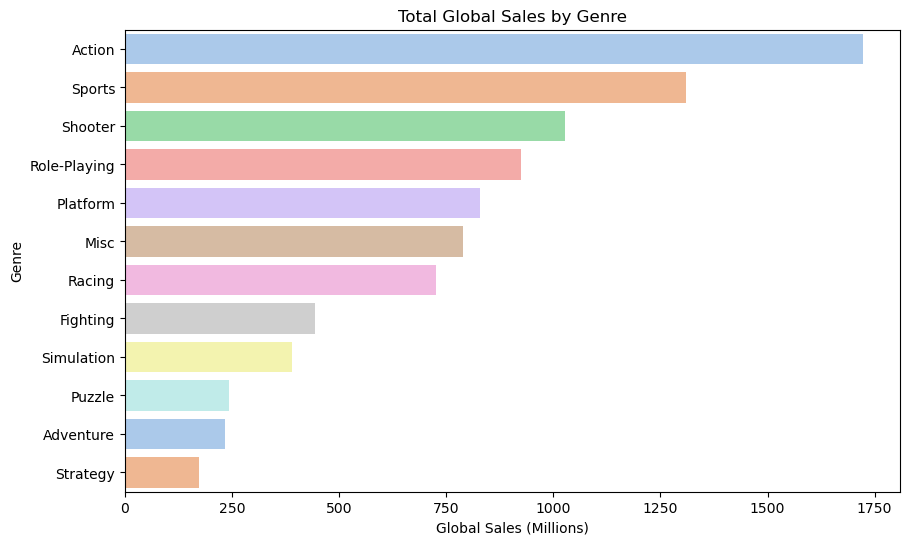

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False),
            x='Global_Sales', y='Genre', palette='pastel')
plt.title("Total Global Sales by Genre")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Genre")
plt.show()

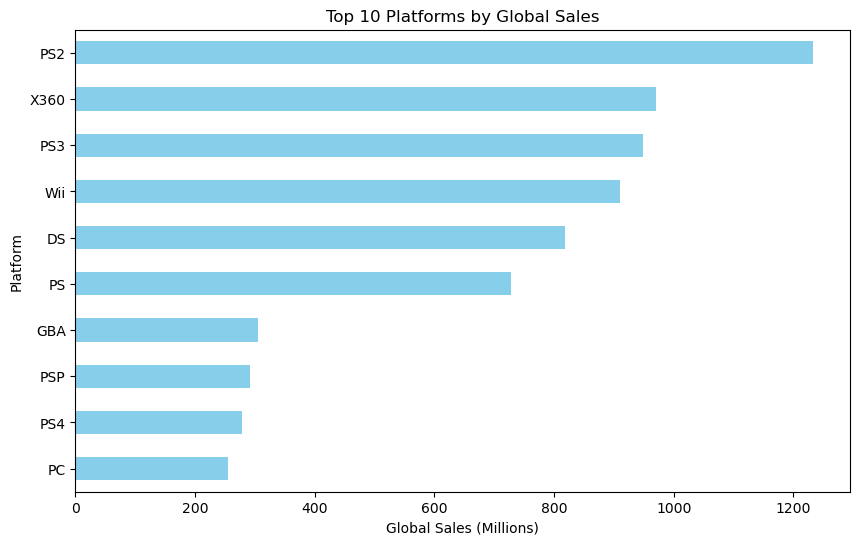

In [12]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='barh', color='skyblue')
plt.title("Top 10 Platforms by Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Platform")
plt.gca().invert_yaxis()
plt.show()

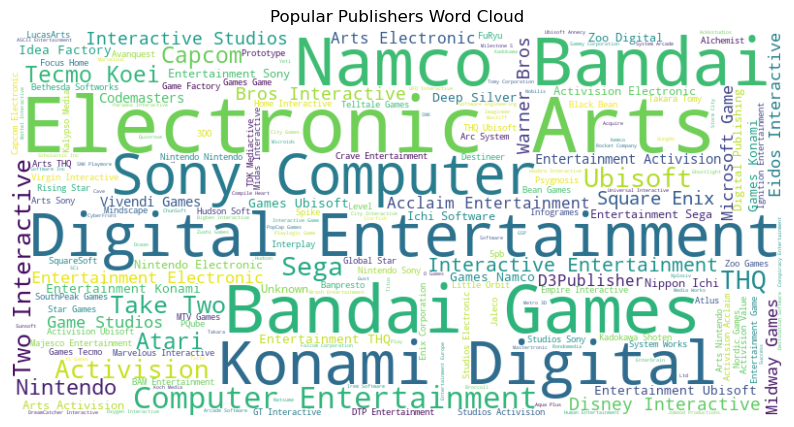

In [13]:
plt.figure(figsize=(10, 6))
text = " ".join(df['Publisher'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Publishers Word Cloud")
plt.show()

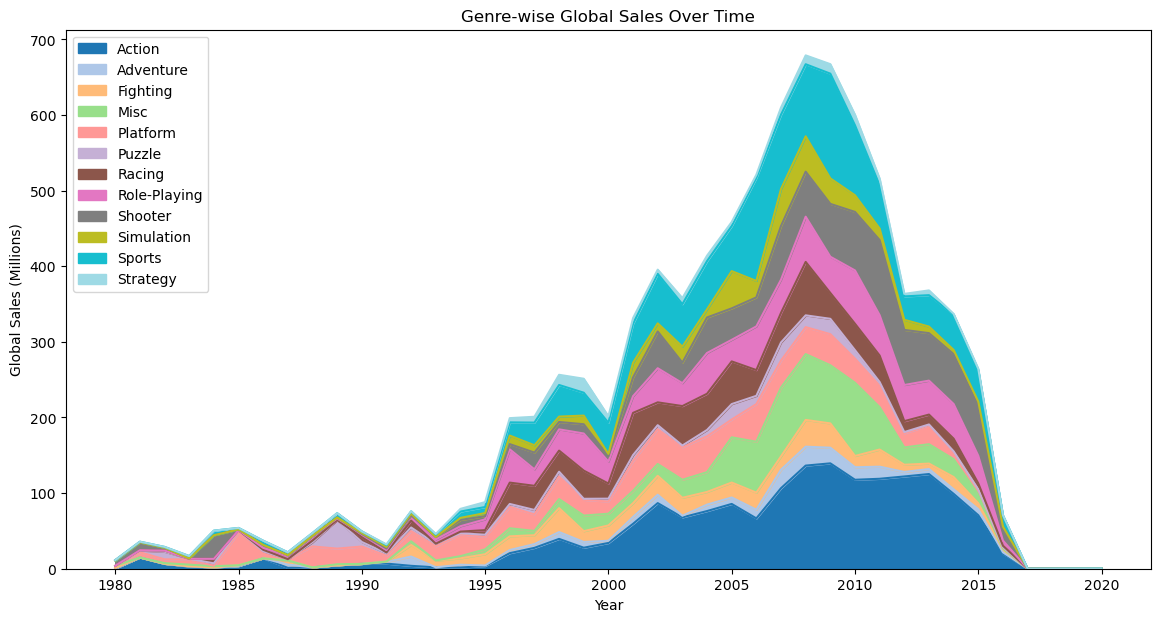

In [14]:
genre_trend = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)
genre_trend.plot(kind='area', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title("Genre-wise Global Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.legend(loc='upper left')
plt.show()

C:\Users\gitan\AppData\Local\Temp\ipykernel_6708\726418965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='Set2')


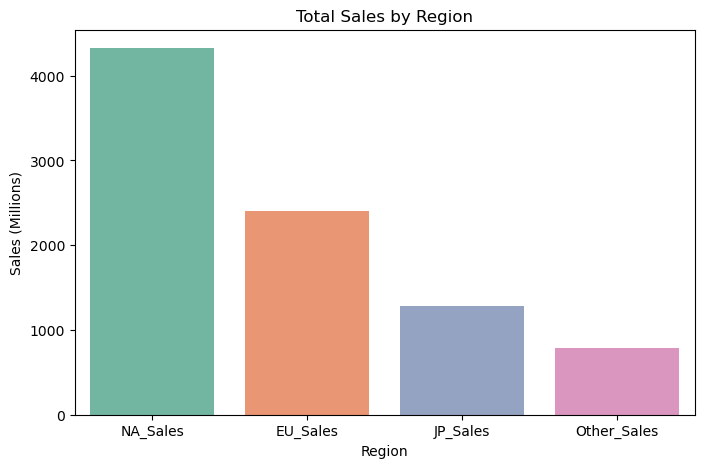

In [15]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Set2')
plt.title("Total Sales by Region")
plt.ylabel("Sales (Millions)")
plt.xlabel("Region")
plt.show()

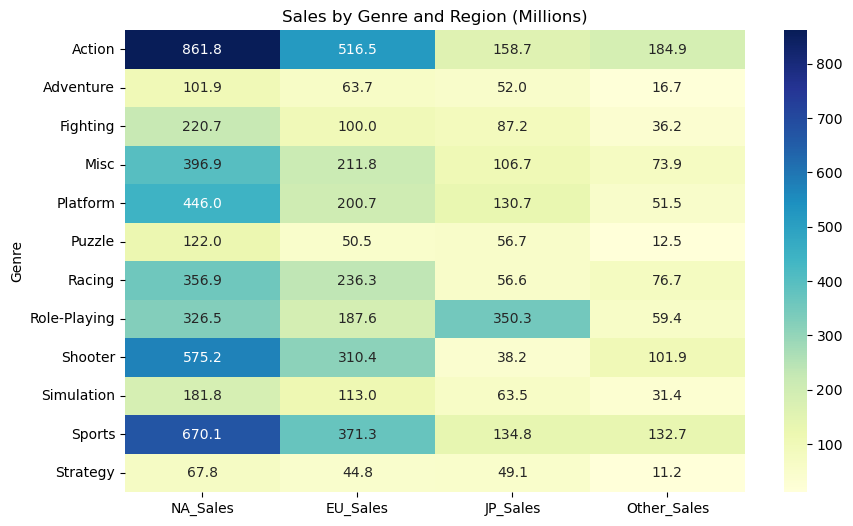

In [16]:
genre_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(10, 6))
sns.heatmap(genre_region, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title("Sales by Genre and Region (Millions)")
plt.show()

In [ ]:
bubble_data = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
fig = px.scatter(bubble_data, x='Year', y='Platform', size='Global_Sales',
                 color='Platform', title="Sales by Platform Over Time",
                 height=600)
fig.show()